### Курсовой проект
В проектной работе хотел бы сделать анализ по годам выпуска фильма по данным imdb.com.<br>
1.По годам выпуска рассчитать основные статистические показатели: Мода, медиана, квартили, дисперсию.<br>
2.Проверить, работает ли нормальное распределение и Паретто.<br>
3.Проверить есть ли зависимость бюджетов, рейтингов, жанров от года выпуска фильмов.<br>
4.Посмотреть поведение год выпуска во времени.<br>
В идеале, хотел бы сделать прогноз на 2020 год: какие жанры с какой вероятностью выйдут определенное количество фильмов с определенным бюджетом и из какой страны<br>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
from scipy import stats
from scipy import stats
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot as qq

Подготовительные работы, загрузка файлов, их сведение в датафрейм summary

In [2]:
akas = pd.read_csv('data_akas.csv', sep='\t', low_memory=False)

In [3]:
ratings = pd.read_csv('data_ratings.csv', sep='\t', low_memory=False)

In [4]:
basics = pd.read_csv('data_basics.csv', sep='\t', low_memory=False)

In [5]:
basics_f = basics[(basics['titleType'] == 'movie') & (basics['startYear'] != '\\N') & (basics['genres'] != '\\N')]
basics_f['genre'] = basics_f['genres'].str.split(',', expand=True)[0]
basics_f = basics_f.drop(columns=['isAdult', 'endYear', 'runtimeMinutes', 'genres', 'primaryTitle'])

C:\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
summary = pd.merge(basics_f, ratings, on='tconst', how='inner')
summary.head(5)

,tconst,titleType,originalTitle,startYear,genre,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,1894,Romance,5.4,81
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,1897,Documentary,5.2,310
2,tt0000335,movie,Soldiers of the Cross,1900,Biography,6.2,39
3,tt0000574,movie,The Story of the Kelly Gang,1906,Biography,6.1,538
4,tt0000615,movie,Robbery Under Arms,1907,Drama,4.8,14


Серии genres и years нам пригодятся дальше

In [7]:
genres = summary['genre'].unique()
genres

array(['Romance', 'Documentary', 'Biography', 'Drama', 'Adventure',
       'Comedy', 'Crime', 'Sci-Fi', 'History', 'War', 'Action', 'Western',
       'Horror', 'Fantasy', 'Mystery', 'Animation', 'Musical', 'Thriller',
       'Music', 'Film-Noir', 'Family', 'Sport', 'Adult', 'News',
       'Game-Show', 'Reality-TV'], dtype=object)

In [8]:
years = np.sort(summary['startYear'].unique())

Функция, которая считает какого жанра было выпущено в каждом году и формирует по окончанию numpy-массив

In [9]:
def count_genres(genre):
    SpisokZhanrov = genres.tolist()
    KolvoVGodu = []
    for i in years:
        ZhanryZaGod = summary[summary['startYear'] == i]
        ZhanryZaGodBezGodv = ZhanryZaGod['genre']
        listgenres = ZhanryZaGodBezGodv.tolist()
        cnt = Counter(listgenres)
        #print(i)
        #print(cnt)
        KolvoVGodu.append(cnt[genre])
    kolvo_array = np.array(KolvoVGodu)
    return kolvo_array

Функция, которая считает медианное значение за год для каждого жанра

In [10]:
def get_count_median_rating(genre):
    SpisokZhanrov = genres.tolist()
    MedianVGodu = []
    for i in years:
        ZhanryZaGod = summary[(summary['startYear'] == i) & (summary['genre'] == genre)]
        RatingZaGod = ZhanryZaGod[['averageRating']] 
        listgenres = np.array(RatingZaGod)
        median = np.median(listgenres)
        MedianVGodu.append(median)
    median_array = np.array(MedianVGodu)
    return median_array

### Задание 1
Составим датафрейм для массивов по количеству за год

In [11]:
dfCountgenres = pd.DataFrame(columns=genres)

for gen in genres:
    array_genre = pd.Series(count_genres(gen))
    array_genre.rename(gen)
    dfCountgenres[gen] = array_genre
dfCountgenres.insert(0, 'year',pd.Series(years))

Проведем расчет Моды, медианы, квартиля и дисперсии по каждому жанру

In [12]:
for gen in genres:
    mean = np.mean(dfCountgenres[gen])
    median = np.median(dfCountgenres[gen])
    mode = stats.mode(dfCountgenres[gen], axis=None)
    d = pow(np.std(dfCountgenres[gen]),2)
    print(f'Для жанра {gen}:')
    print(f'Mean = {mean}')
    print(f'Median = {median}')
    print(f'Mode = {mode}')
    print(f'D = {d}')
    print('#'*40)

Для жанра Romance:
Mean = 21.024193548387096
Median = 14.0
Mode = ModeResult(mode=array([0]), count=array([13]))
D = 636.5074791883453
########################################
Для жанра Documentary:
Mean = 226.1209677419355
Median = 22.0
Mode = ModeResult(mode=array([1]), count=array([9]))
D = 202806.67085067634
########################################
Для жанра Biography:
Mean = 52.346774193548384
Median = 19.5
Mode = ModeResult(mode=array([0]), count=array([11]))
D = 10429.29103798127
########################################
Для жанра Drama:
Mean = 530.7741935483871
Median = 428.0
Mode = ModeResult(mode=array([0]), count=array([9]))
D = 305661.8844953174
########################################
Для жанра Adventure:
Mean = 81.46774193548387
Median = 73.0
Mode = ModeResult(mode=array([0]), count=array([12]))
D = 4784.958636836627
########################################
Для жанра Comedy:
Mean = 424.66129032258067
Median = 344.5
Mode = ModeResult(mode=array([0]), count=array([10]))
D = 

Изобразим квантили при помощи графика seaborn

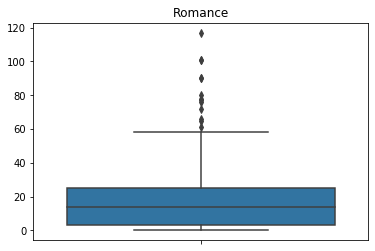

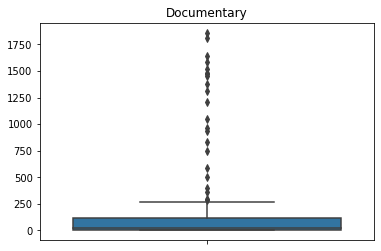

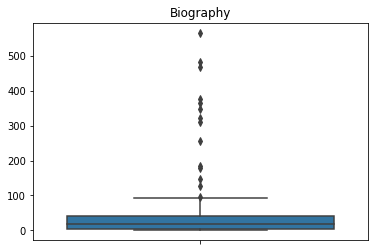

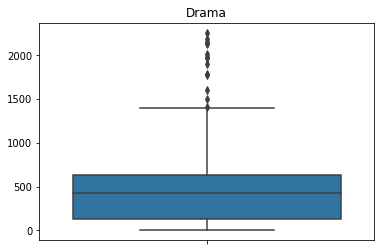

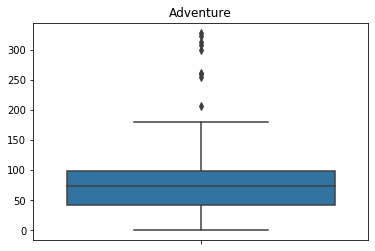

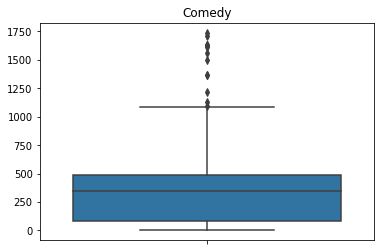

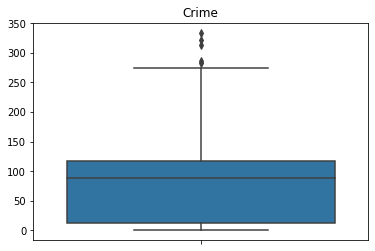

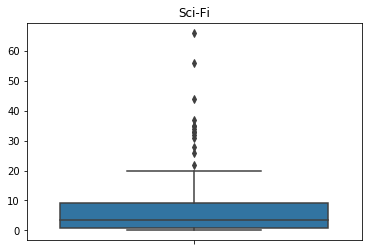

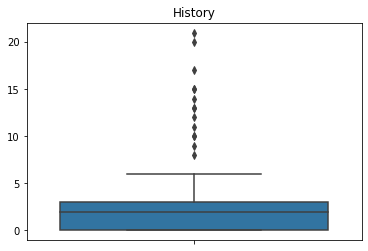

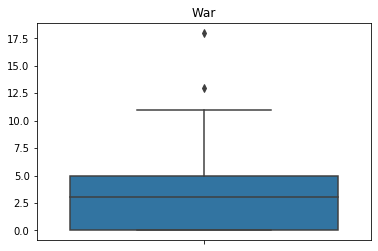

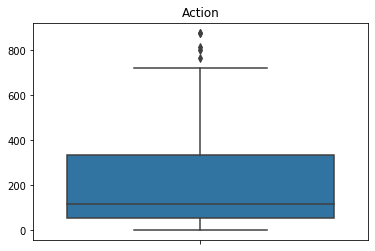

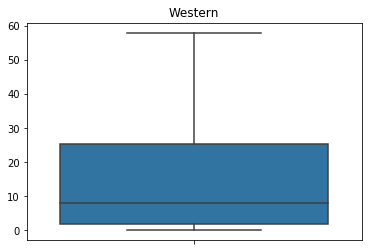

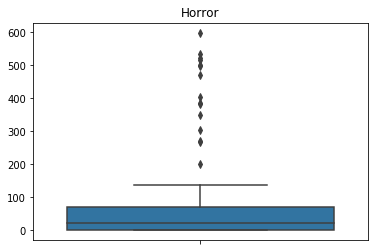

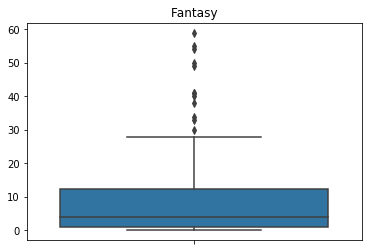

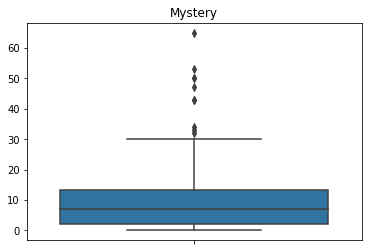

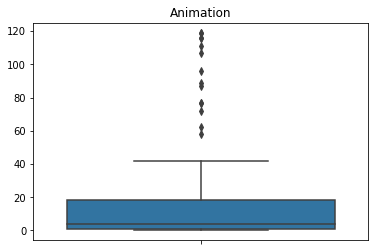

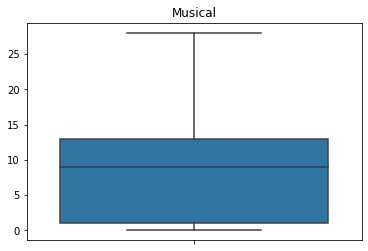

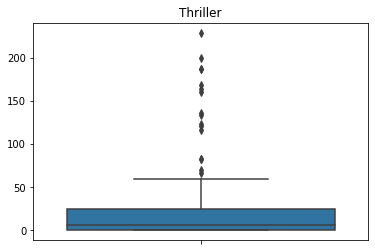

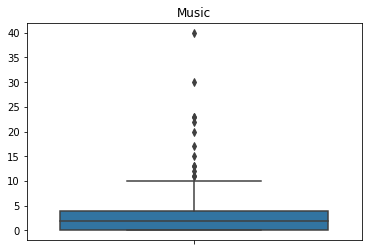

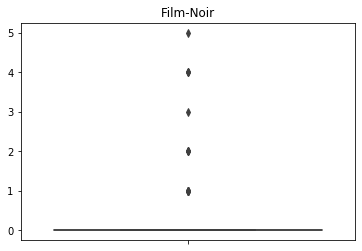

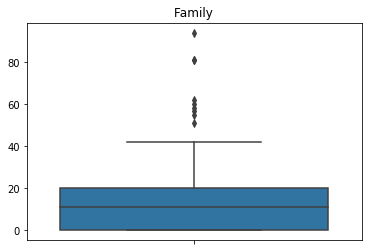

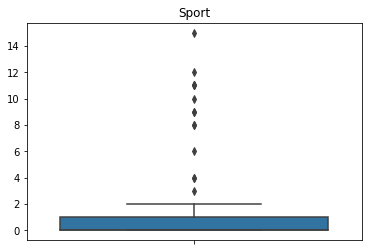

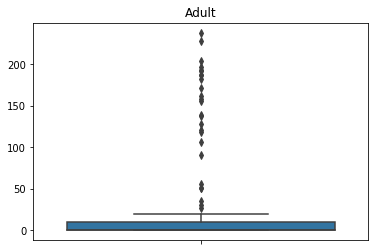

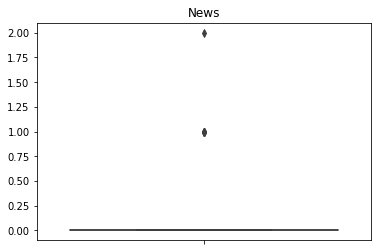

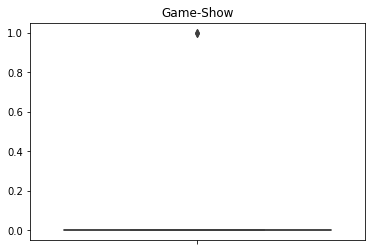

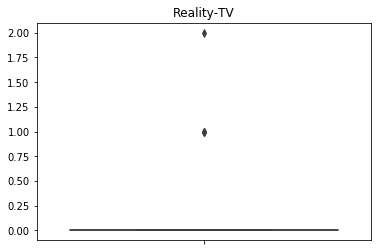

In [13]:
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.5)
for gen in genres:
    sns.boxplot([dfCountgenres[gen]], orient='v')
    plt.title(gen)
    plt.show()

Проведем расчеты для рейтинга

In [14]:
dfMedian = pd.DataFrame(columns=genres)

for gen in genres:
    array_genre = pd.Series(get_count_median_rating(gen))
    array_genre.rename(gen)
    dfMedian[gen] = array_genre
dfMedian.insert(0, 'year',pd.Series(years))
dfMedian.fillna(0)

C:\Program Files\Python37\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Python37\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,year,Romance,Documentary,Biography,Drama,Adventure,Comedy,Crime,Sci-Fi,History,...,Musical,Thriller,Music,Film-Noir,Family,Sport,Adult,News,Game-Show,Reality-TV
0,1894,5.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0
1,1897,0.00,4.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0
2,1898,3.40,4.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0
3,1899,0.00,3.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,4.4,0.0,0.0
4,1900,0.00,0.00,6.20,0.00,0.00,4.70,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,7.1,0.0,0.0
5,1901,0.00,4.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0
6,1902,0.00,3.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0
7,1903,0.00,4.60,0.00,3.40,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0
8,1904,0.00,5.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0
9,1905,0.00,4.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,3.90,0.0,0.00,0.00,0.00,0.0,0.0,0.0


In [15]:
for gen in genres:
    mean = np.mean(dfMedian[gen])
    median = np.median(dfMedian[gen])
    mode = stats.mode(dfMedian[gen], axis=None)
    d = pow(np.std(dfMedian[gen]),2)
    print(f'Для жанра {gen}:')
    print(f'Mean = {mean}')
    print(f'Median = {median}')
    print(f'Mode = {mode}')
    print(f'D = {d}')
    print('#'*40)

Для жанра Romance:
Mean = 6.136486486486485
Median = nan
Mode = ModeResult(mode=array([6.3]), count=array([11]))
D = 0.3317543218894569
########################################
Для жанра Documentary:
Mean = 6.854237288135592
Median = nan
Mode = ModeResult(mode=array([7.3]), count=array([17]))
D = 0.5604481470841715
########################################
Для жанра Biography:
Mean = 6.665486725663717
Median = nan
Mode = ModeResult(mode=array([7.]), count=array([11]))
D = 0.32411856840786285
########################################
Для жанра Drama:
Mean = 6.32608695652174
Median = nan
Mode = ModeResult(mode=array([6.4]), count=array([33]))
D = 0.3154933837429111
########################################
Для жанра Adventure:
Mean = 5.9941964285714295
Median = nan
Mode = ModeResult(mode=array([6.]), count=array([21]))
D = 0.24079221141581636
########################################
Для жанра Comedy:
Mean = 6.076315789473683
Median = nan
Mode = ModeResult(mode=array([6.]), count=array([26])

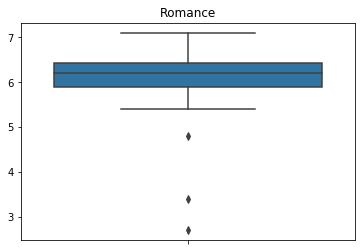

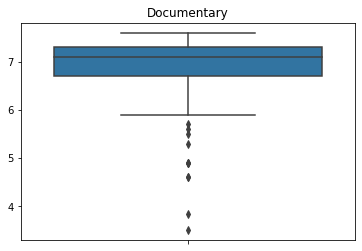

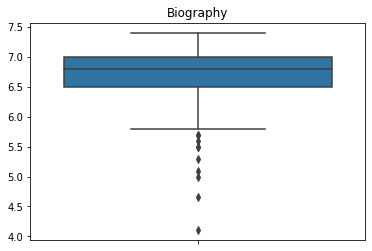

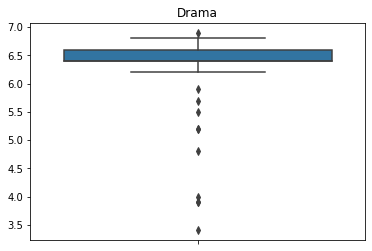

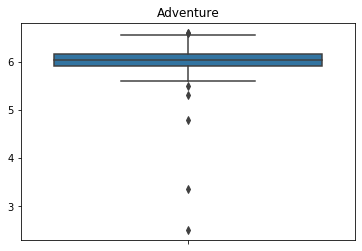

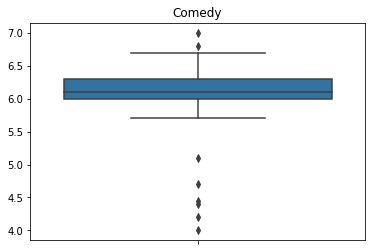

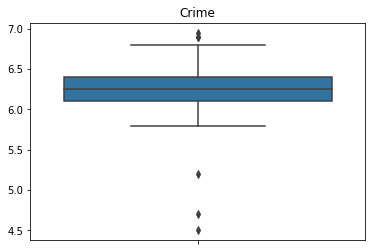

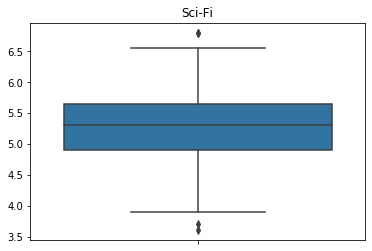

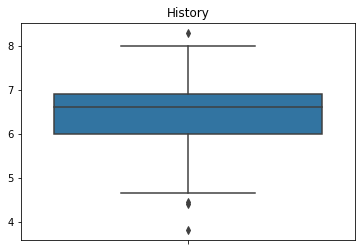

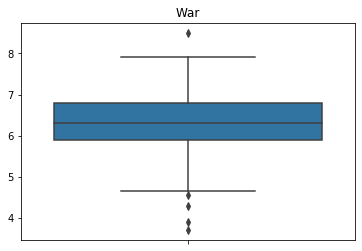

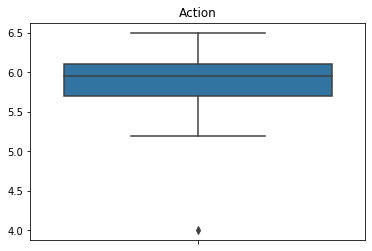

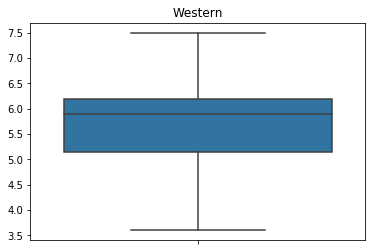

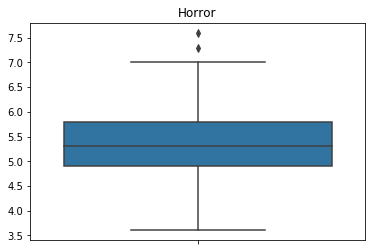

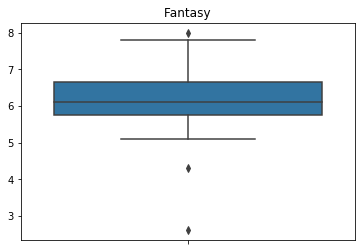

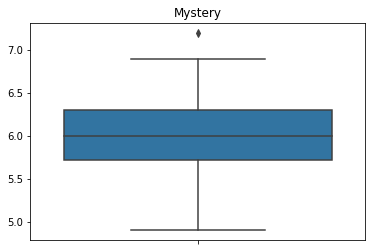

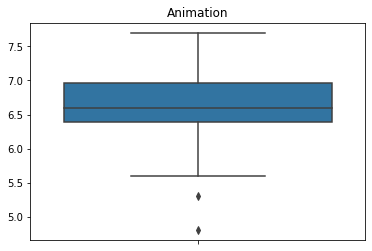

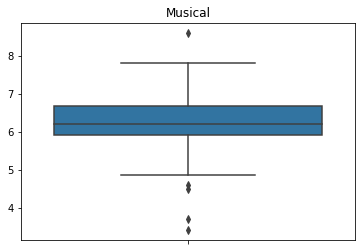

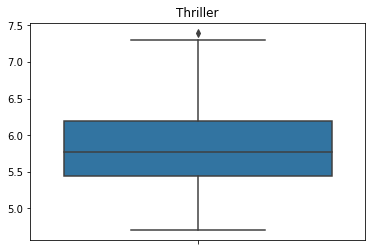

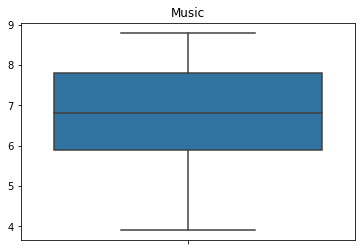

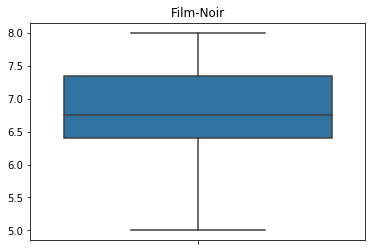

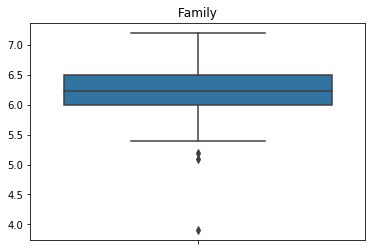

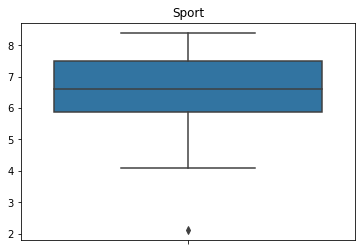

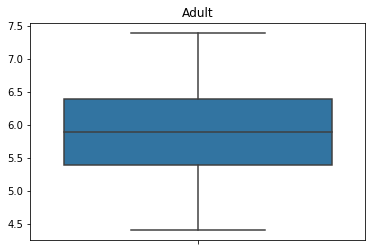

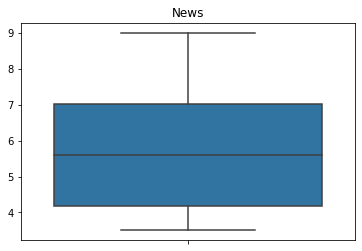

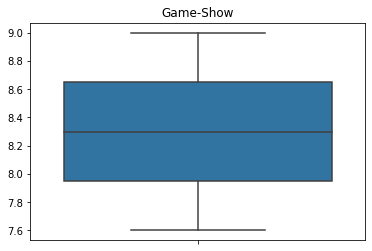

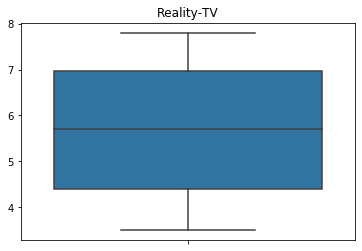

In [16]:
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.5)
for gen in genres:
    sns.boxplot([dfMedian[gen]], orient='v')
    plt.title(gen)
    plt.show()

## Задание 2
Проверим работает ли распределение Паретто на данном массиве:

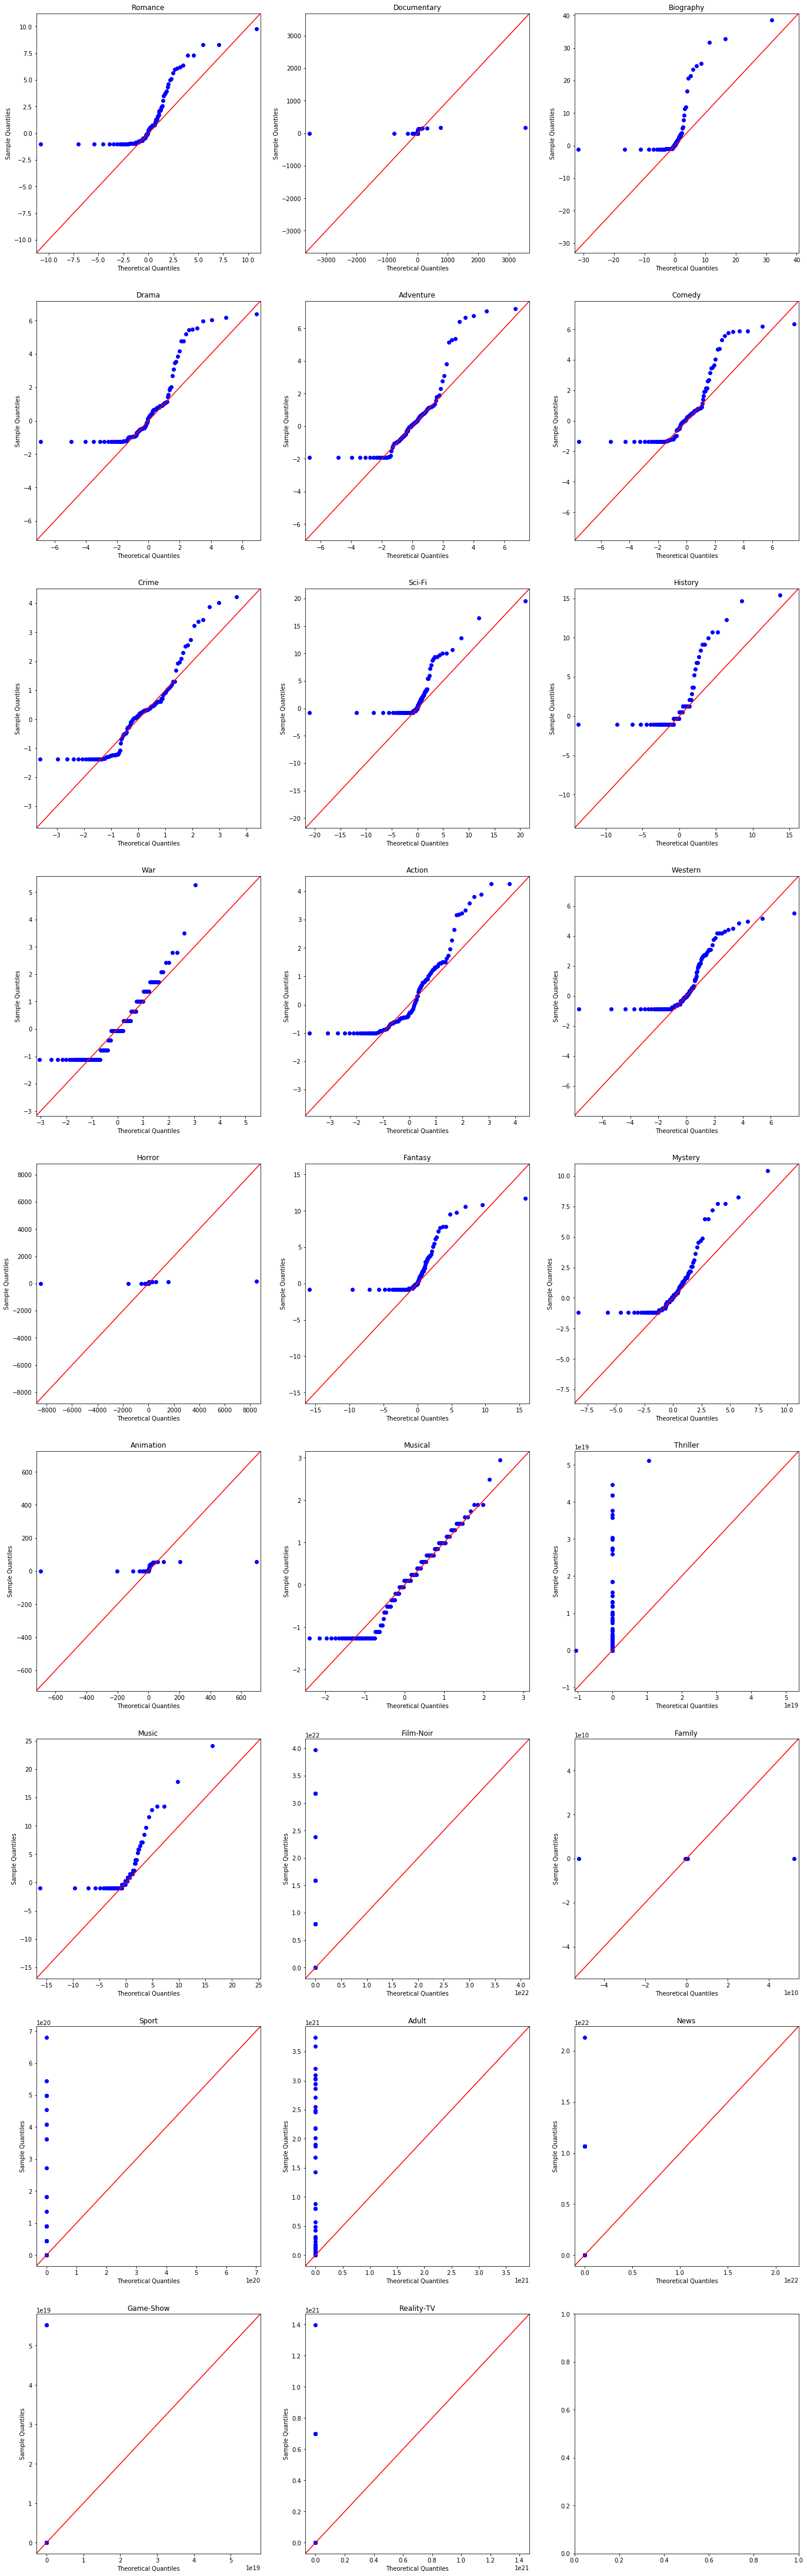

In [17]:
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(9,20))
plt.subplots_adjust(top = 10, bottom = 7, left = 8, right = 10)
ax= axes.flatten()
i = 0

for gen in genres:
    qq(dfCountgenres[gen], fit = True, line='45', ax=ax[i], dist= stats.t)
    ax[i].title.set_text(gen)
    i += 1

Наиболее выражено распределение Паретто для жанров Musical, War

Аналогичные действия проведем для медианных значений

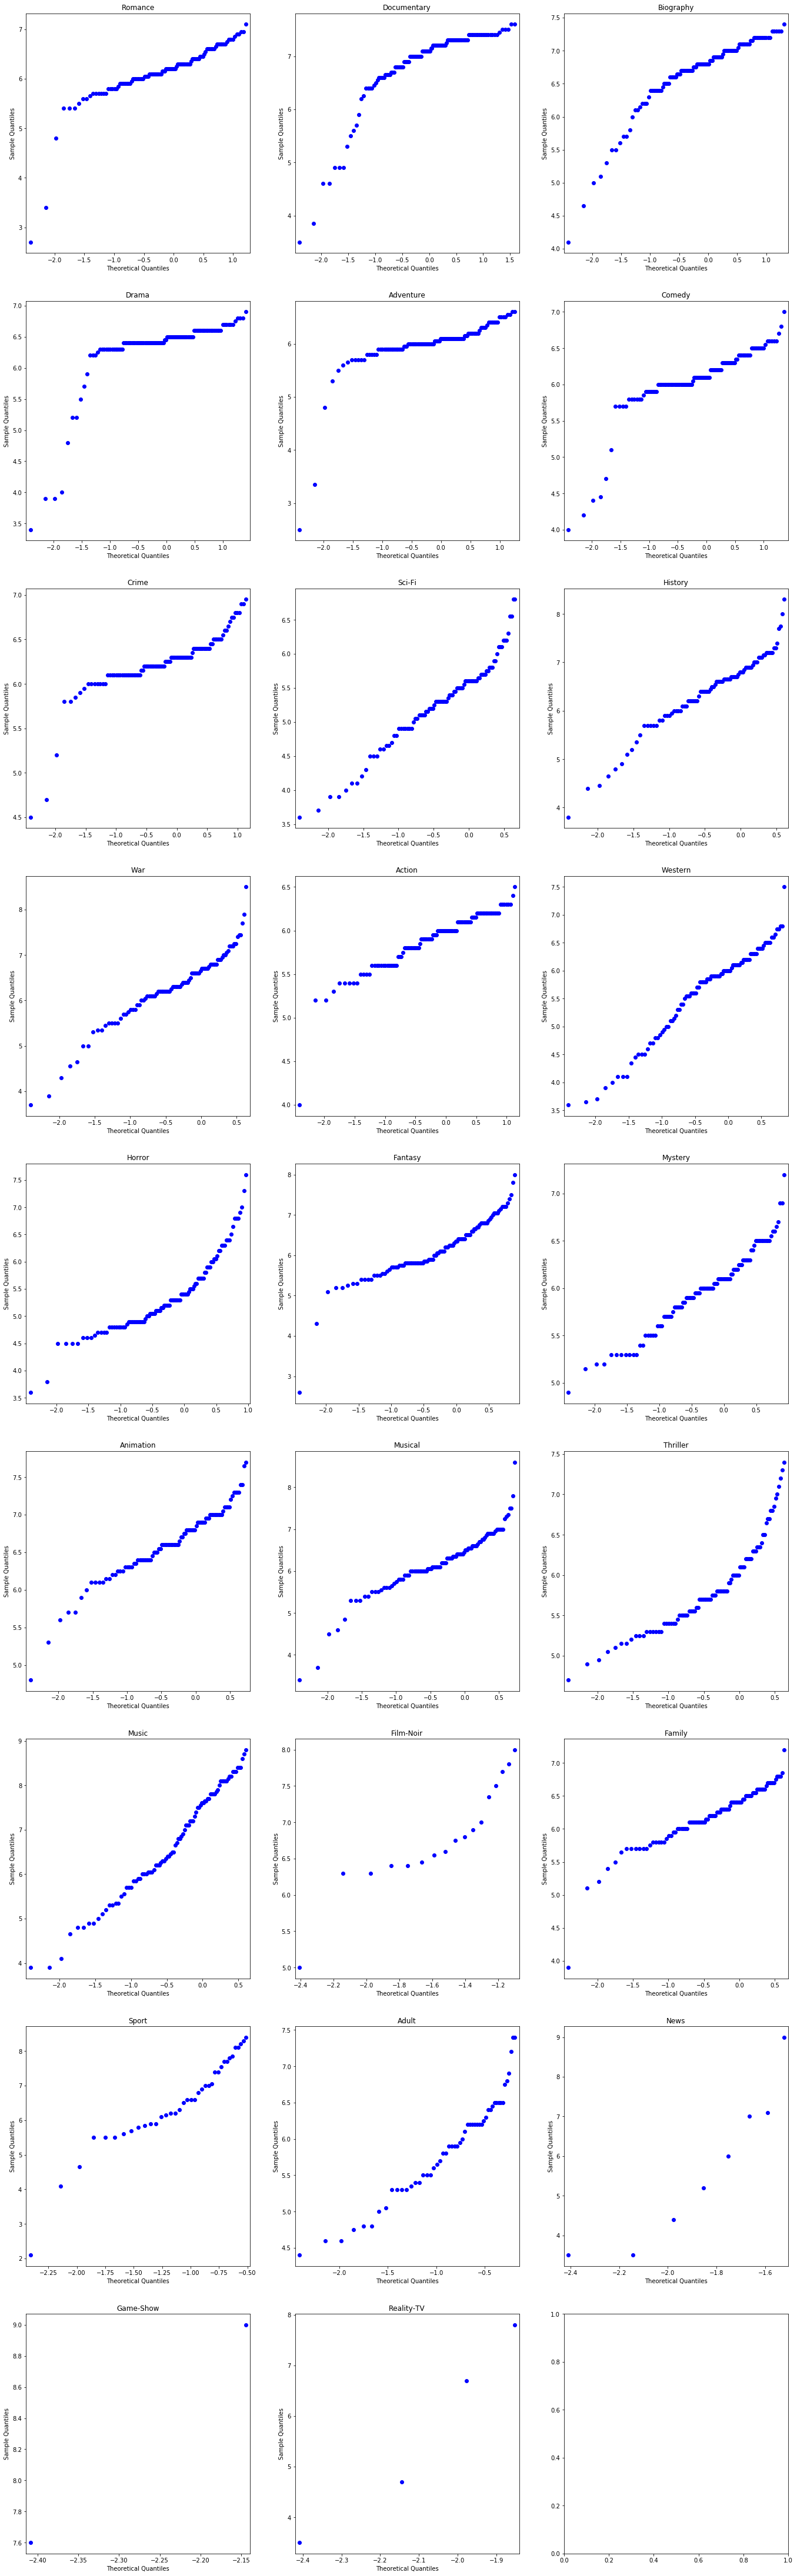

In [18]:
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(9,20))
plt.subplots_adjust(top = 10, bottom = 7, left = 8, right = 10)
ax= axes.flatten()
i = 0

for gen in genres:
    qq(dfMedian[gen], ax=ax[i])
    ax[i].title.set_text(gen)
    i += 1

Наиболее выражено распределение Паретто для рейтингов в жанрах Music, Sci-fi

## Задание 3 и 4

Построим корреляционную матрицу чтобы оценить, есть ли линейная зависимость между жанрами

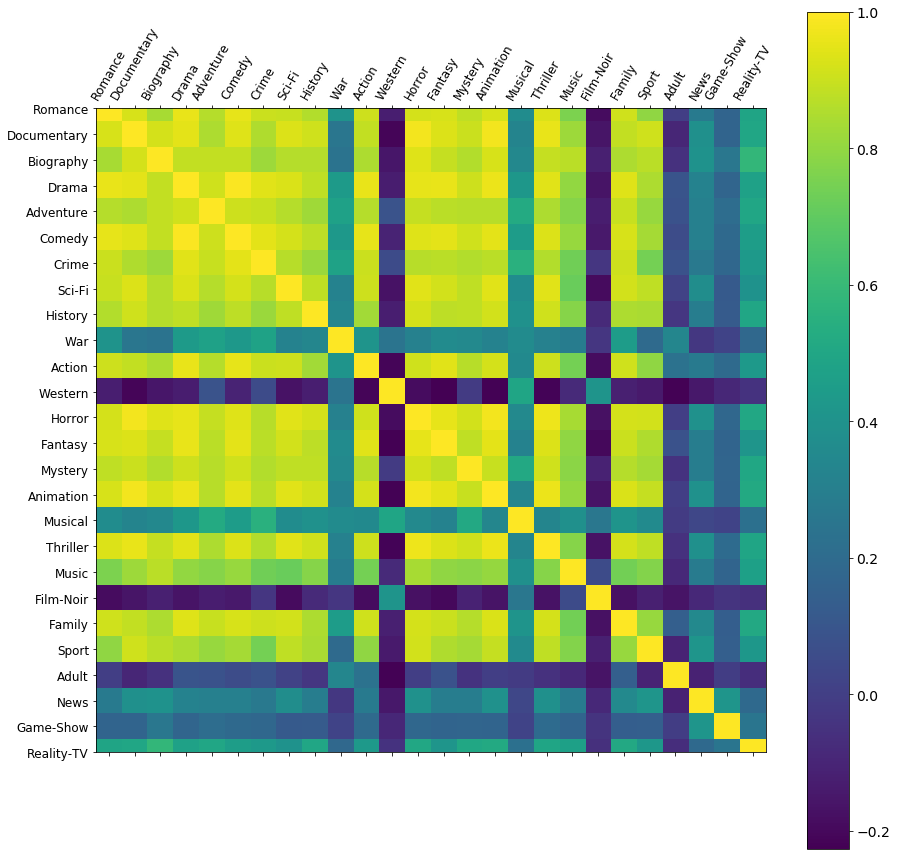

In [19]:
f = plt.figure(figsize=(15, 15))
corrdataset = dfCountgenres.drop(dfCountgenres.columns[[0]], axis='columns')
plt.matshow(corrdataset.corr(), fignum=f.number)
plt.xticks(range(corrdataset.shape[1]), corrdataset.columns, fontsize=12, rotation=60)
plt.yticks(range(corrdataset.shape[1]), corrdataset.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

Аналогичную матрицу построим для рейтингов

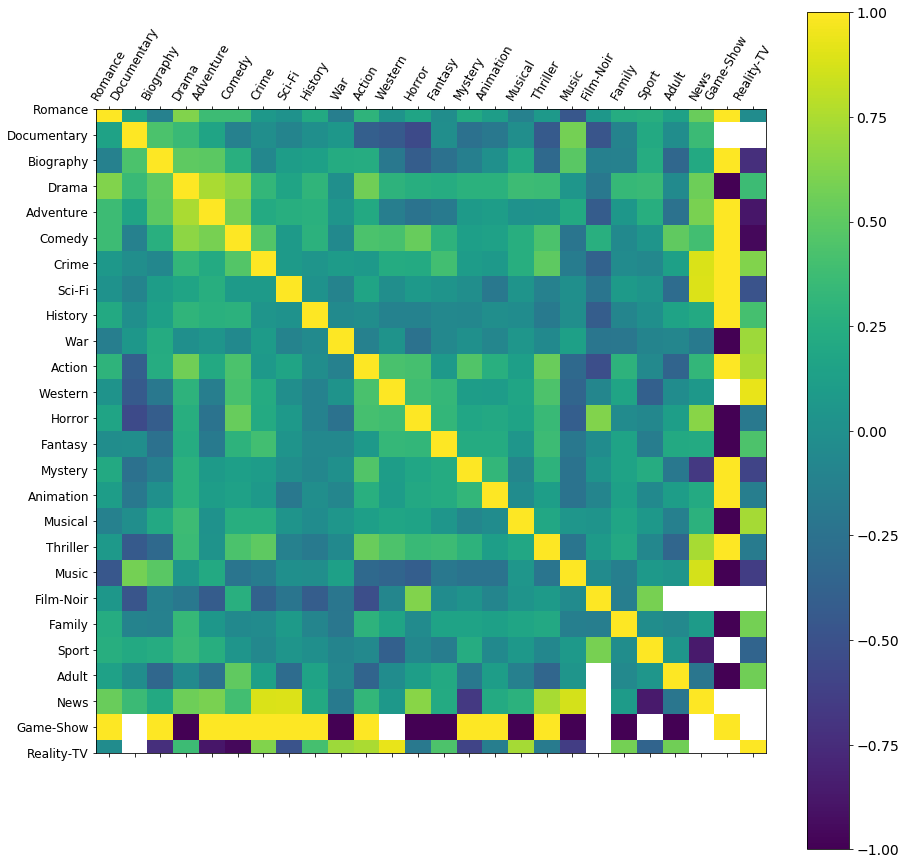

In [20]:
f = plt.figure(figsize=(15, 15))
corrdataset = dfMedian.drop(dfMedian.columns[[0]], axis='columns')
plt.matshow(corrdataset.corr(), fignum=f.number)
plt.xticks(range(corrdataset.shape[1]), corrdataset.columns, fontsize=12, rotation=60)
plt.yticks(range(corrdataset.shape[1]), corrdataset.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)